# Data Prepration section

### The Dataset:
As a data analyst I got New York data from NYU spatial data repository and find that it gas 5 boroughs:

* Manhattan with 40 neighbors
* Bronx with 52 neighbors
* Staten with Island 63 neighbors
* Brooklyn with 70 neighbors
* Queens with 81 neighbors

In [1]:
# import pandas library to work with dataframe
import pandas as pd
import numpy as np
import matplotlib as mat

In [2]:
# @hidden_cell
CLIENT_ID = '2UABPTQXVSFUWXVMSQYXON4FACFMLWPELLQFVBYK3S0TLBNV' # your Foursquare ID
CLIENT_SECRET = 'AFKQI22J5NIJ1JSMPU0ZJ2TGHMPAIT04BAPUUD1MOAOIYVLE' # your Foursquare Secret
VERSION = '20180604'

In [45]:
#!conda install -c conda-forge geopy --yes 
!pip install geopy 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium # plotting library

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [4]:
# Function for creating map of any borough using latitude and longitude values
def print_map (my_data, zoom=11):
    my_map = folium.Map(location=[latitude, longitude], zoom_start=zoom)
    for lat, lng, label in zip(my_data['Latitude'], my_data['Longitude'], my_data['Neighborhood']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(my_map)
    return my_map

In [5]:
!wget -q -O 'newyork_data.json' https://geo.nyu.edu/download/file/nyu-2451-34572-geojson.json
print('Data downloaded!')

Data downloaded!


In [7]:
with open('newyork_data.json') as json_data:
    df_newyork = json.load(json_data)

In [8]:
df_newyork = df_newyork['features']

In [9]:
#let us have a look
df_newyork[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork_data = pd.DataFrame(columns=column_names)

In [11]:
len(df_newyork)

306

In [12]:
# let us populate it
for data in df_newyork:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_data = newyork_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
newyork_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [28]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(newyork_data['Borough'].unique()),
        newyork_data.shape[0]
    )
)

#how many neighborhood each borough has
df_groups = newyork_data.groupby (['Borough']).count()
df_groups

The dataframe has 5 boroughs and 306 neighborhoods.


,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


In [15]:
# Use geopy library to get the latitude and longitude values of New York City.
address = 'New York City, NY'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of New York City are 40.7308619, -73.9871558.


In [65]:
# create map of New York using latitude and longitude values
print_map (newyork_data, zoom=10)

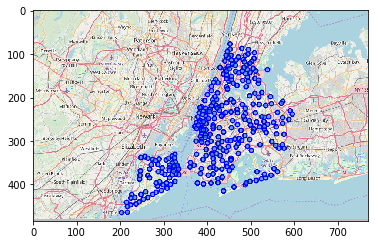

In [67]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('newyork.jpg'))

In [17]:
manhattan_data = newyork_data[newyork_data['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [62]:
# create map of Manhattan using latitude and longitude values
print_map (manhattan_data, zoom=10)

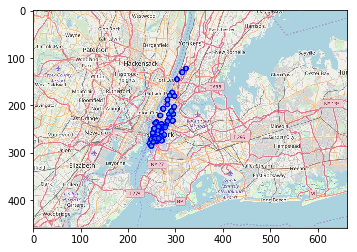

In [64]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('manhattan.jpg'))

In [19]:
bronx_data = newyork_data[newyork_data['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [59]:
# create map of Manhattan using latitude and longitude values
print_map (bronx_data, zoom=10)

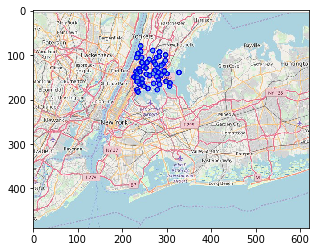

In [61]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('bronx.jpg'))

In [38]:
brooklyn_data = newyork_data[newyork_data['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [57]:
# create map of Manhattan using latitude and longitude values  
print_map (brooklyn_data, zoom=10)    


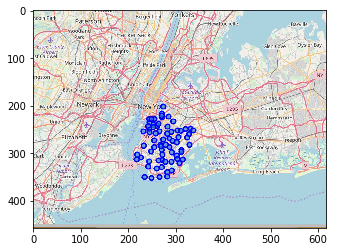

In [58]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('brooklyn.jpg'))


In [23]:
queens_data = newyork_data[newyork_data['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [48]:
# create map of Manhattan using latitude and longitude values  
print_map (queens_data, zoom=10)    

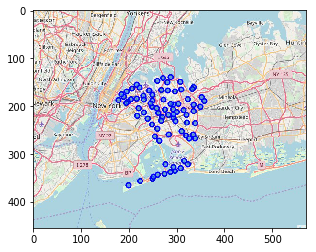

In [56]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('Queens.jpg'))


In [25]:
StatenIsland_data = newyork_data[newyork_data['Borough'] == 'Staten Island'].reset_index(drop=True)
StatenIsland_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [44]:
# create map of Manhattan using latitude and longitude values  
print_map (StatenIsland_data, zoom=10)    

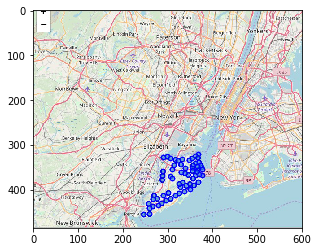

In [47]:
# a little tweak to show maps as images in github
plt.imshow(mpimg.imread('StatenIsland.jpg'))